Olá **Cientista**!

Bem vinda e bem vindo ao **mega desafio do Módulo 01**, neste desafio queremos que você aplique tudo que aprendeu no curso, analisando uma outra informação ~~referente a base de dados de [produção hospitalar](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi), seja número de internação, óbito, AIH ou taxa de mortalidade.~~ 

**P.S: Infelizmente o DataSUS está fora do ar por tempo indeterminado, para você não parar seu projeto, adicionamos no [GitHub](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados) do curso, duas novas bases para você utilizar neste projeto (COVID-19 e Óbitos).**

Uma base é dos **casos de COVID-19 baixadas do projeto [BRASIL.IO](https://brasil.io/dataset/covid19/caso/)**, outra são os números de óbitos registrados no cartório civil desde 1970 retirado do **[Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil)**.

Vocês podem escolher qualquer uma das duas bases de dados, a de COVID-19 é mais desafiadora e você vai precisar descompactar o arquivo por ser grande e entrar no site do Brasil.IO para entender todas as features presentes (No Brasil.IO tem diversas bases sobre COVID-19, estamos usando a chamada **Casos**). A base de óbito é mais simples e relativamente semelhate a utilizada no curso.

Algumas dicas para você mandar bem no desafio final, capriche nas análises, escreva suas conclusões e hipóteses (mesmo que resultado seja inconclusivo) e não esqueça de colocar um resumo dos pontos que julgar mais interessantes do seu projeto.



E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook [neste formulário](https://docs.google.com/forms/d/e/1FAIpQLSd1jemhvdo8sM6e-bgOryyZ2P3YuMO6E_mUQXabyBX_xhuZQQ/viewform?usp=sf_link) até dia 22/11 às 23h59.

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)

Qualquer dúvida não deixe de perguntar no Discord, compatilhe seu projeto nas redes sociais e crie um repositório no github, esse é o início do seu portifólio em Data Science.



Fique a vontade para utilizar esse notebook como template projeto.



## Resumo:

Faça aqui o resumo das suas analises, destacando os pontos principais do seu projeto

Ao começar o projeto, fiz algumas análises exploratórias do número de mortes por estado e comecei a perceber que alguns estados se comportam de maneira diferente em relação a outros.
Ao passo que alguns estados da mesma região possuíam um pico cedo e curto, outros possuiam picos duradouros e outros picos tardios. Comecei a avaliar as possibilidades e notei que algo podia ter a ver com isso: estados com maior ou menos densidade populacional em suas cidades.
É sabido que a densidade populacional é um fator a se levar em conta para a pandemia, visto que o isolamento social visa justamente reduzir o número de pessoas em km². Contudo, será que podemos ter outputs um pouco mais assertivos quanto a isso?
Com esses outputs, podemos saber, por exemplo, o quanto a densidade aumenta ou abaixa a demora para o pico, a grandeza do seu plateau e como ele acontece.

Para isso, utilizei o seguinte critério:
- Cidades com menos de 13 pessoas por km² foarm consideradas de baixa densidade;
- Cidades com entre 13 e 58 pessoas por km² foram consideradas de média densidade;
- Cidades com mais de 58 pessoas por km² foram consideradas de alta densidade.

Esse números foram calculados a partir dos quartis de densidade do Brasil.

Dito isso, rodei a análise com a região sudeste, sabidamente uma região bastante afetada pela pandemia e uma região com densidades amplas (MG e ES, por ex, possuem densidades muito diferentes de SP e RJ). E foi esse recorte que usei para extrair alguma informação.

Como é possível notar nos gráficos abaixo, descobri o seguinte:
- Cidades com menores densidades possuem subidas mais instáveis que as de média e alta (alto número de quedas), picos mais tardios que as de alta (pelo menos 2 meses de diferença), e picos também com valores mais instáveis (bastante oscilação no plateau).
- Cidades com densidades médias, possuem subidas mais longas que as de alta densidade, mas também bastante estáveis. Possuem picos mais longos que as de baixa densidade, mas com menos oscilações no plateau.
- Cidades com altas densidades possuem picos muito longos e instávels, e chegam até ele com pelo menos 2 meses de antecedência que as demais.

Se esses dados refletirem a realidade, podemos usar eles como base para uma segunda onda da pandemia, preparando cidades de maior densidade para receber mais pessoas nos hospitais por um longo período de tempo. Nas cidades de média, o preparo deve ser para receber um alto número de pessoas por um curto período de tempo. E nas cidades de pequenas densidades, o preparo deve ser para receber tardiamente um número que oscila de pessoas.

###Plots:

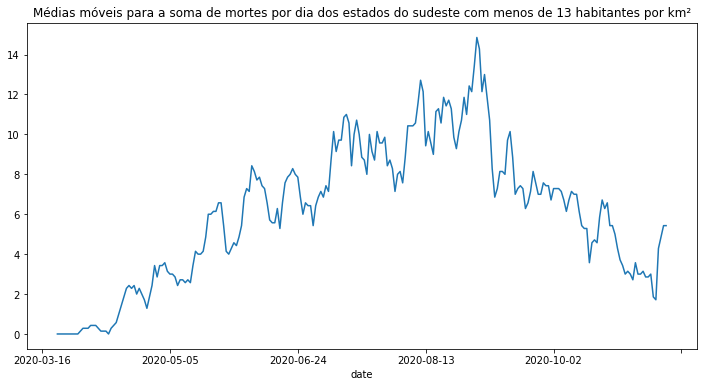

In [ ]:
numbers = caso_full_cidade_densidade_pequena_sudeste_agregado['new_deaths']
window_size = 7

numbers_series = pd.Series(numbers)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()
moving_averages.plot(figsize=(12,6),
                     title='Médias móveis para a soma de mortes por dia dos estados do sudeste com menos de 13 habitantes por km²')

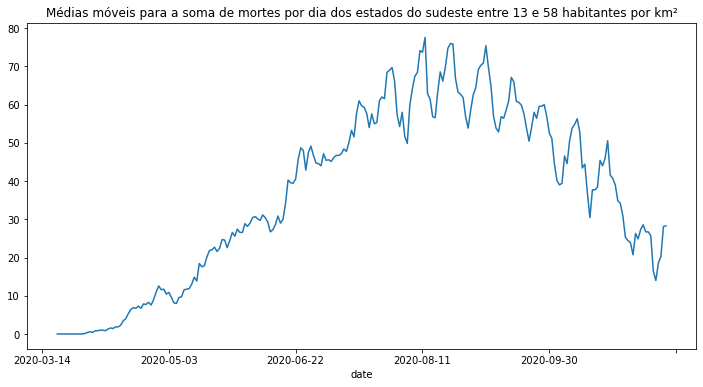

In [ ]:
numbers = caso_full_cidade_densidade_media_sudeste_agregado['new_deaths']
window_size = 7

numbers_series = pd.Series(numbers)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()
moving_averages.plot(figsize=(12,6),
                     title='Médias móveis para a soma de mortes por dia dos estados do sudeste entre 13 e 58 habitantes por km²')

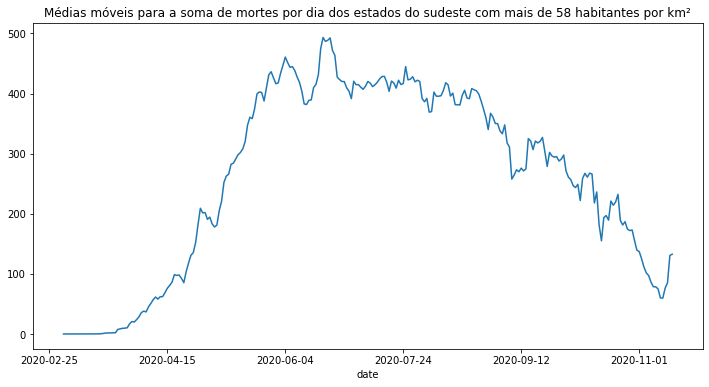

In [ ]:
numbers = caso_full_cidade_densidade_alta_sudeste_agregado['new_deaths']
window_size = 7

numbers_series = pd.Series(numbers)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()
moving_averages.plot(figsize=(12,6),
                     title='Médias móveis para a soma de mortes por dia dos estados do sudeste com mais de 58 habitantes por km²')

## Análise dos dados:

Inicie aqui o desenvolvimento do seu projeto, não esqueça de adicionar textos curtos e objetivos para que os avaliadores entendam sua linha de raciocínio e as conclusões que você está chegando crie uma narrativa convincente e coerênte aos dados analisados.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Dataset "boletim"

In [ ]:
boletim = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Science - Alura 2020/Módulo 1 - Dados SUS/Projeto Final/boletim.csv')
boletim

,date,notes,state,url
0,2020-03-16,NaN,AP,https://www.portal.ap.gov.br/noticia/1603/bole...
1,2020-03-17,NaN,AP,https://www.portal.ap.gov.br/noticia/1703/bole...
2,2020-03-18,NaN,AP,https://www.portal.ap.gov.br/noticia/1803/bole...
3,2020-03-19,NaN,AP,https://www.portal.ap.gov.br/noticia/1903/bole...
4,2020-03-20,NaN,AP,https://www.portal.ap.gov.br/noticia/2003/bole...
...,...,...,...,...
7199,2020-05-04,NaN,SP,http://www.saude.sp.gov.br/resources/cve-centr...
7200,2020-05-03,NaN,SP,http://www.saude.sp.gov.br/resources/cve-centr...
7201,2020-05-02,NaN,SP,http://www.saude.sp.gov.br/resources/cve-centr...
7202,2020-05-01,NaN,SP,http://www.saude.sp.gov.br/resources/cve-centr...


Esse dataset não se mostrou mto útil para a análise.

#Dataset caso_full

##Importando o dataset

In [ ]:
caso_full = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Science - Alura 2020/Módulo 1 - Dados SUS/Projeto Final/caso_full.csv')
caso_full.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0,0,3,city,SP,0,0


In [ ]:
caso_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061203 entries, 0 to 1061202
Data columns (total 18 columns):
 #   Column                                         Non-Null Count    Dtype  
---  ------                                         --------------    -----  
 0   city                                           1054503 non-null  object 
 1   city_ibge_code                                 1057000 non-null  float64
 2   date                                           1061203 non-null  object 
 3   epidemiological_week                           1061203 non-null  int64  
 4   estimated_population                           1057000 non-null  float64
 5   estimated_population_2019                      1057000 non-null  float64
 6   is_last                                        1061203 non-null  bool   
 7   is_repeated                                    1061203 non-null  bool   
 8   last_available_confirmed                       1061203 non-null  int64  
 9   last_available_confirmed

In [ ]:
caso_full['city'].unique()

array(['São Paulo', nan, 'Barra Mansa', ..., 'Pedras Altas',
       'Estrela Velha', 'Coqueiro Baixo'], dtype=object)

Descobri que o dataset está unindo dados de estado com dados de cidade. Vou separar os datasets.

##Criando um dataset por estado

In [ ]:
caso_full_estado = caso_full[caso_full['city'].isnull()]
caso_full_estado

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
1,NaN,35.0,2020-02-25,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0000,0,1,state,SP,1,0
3,NaN,35.0,2020-02-26,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0000,0,2,state,SP,0,0
5,NaN,35.0,2020-02-27,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-27,0.0000,0,3,state,SP,0,0
7,NaN,35.0,2020-02-28,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-28,0.0000,0,4,state,SP,1,0
9,NaN,35.0,2020-02-29,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-29,0.0000,0,5,state,SP,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061198,NaN,43.0,2020-11-15,47,11422973.0,11377239.0,True,False,278707,2439.88146,2020-11-15,0.0223,6219,251,state,RS,1188,4
1061199,NaN,42.0,2020-11-15,47,7252502.0,7164788.0,True,False,295946,4080.60556,2020-11-15,0.0112,3318,249,state,SC,2144,9
1061200,NaN,28.0,2020-11-15,47,2318822.0,2298696.0,True,False,86045,3710.72036,2020-11-15,0.0263,2259,247,state,SE,65,2
1061201,NaN,35.0,2020-11-15,47,46289333.0,45919049.0,True,False,1168640,2524.64212,2020-11-15,0.0347,40564,265,state,SP,1218,15


In [ ]:
caso_full_estado['city_ibge_code'].unique()

array([35., 32., 33., 29., 53., 27., 31., 43., 52., 25., 26., 41., 24.,
       42., 13., 50., 28., 23., 12., 15., 17., 22., 16., 21., 51., 11.,
       14.])

In [ ]:
def state (row):
   if row['city_ibge_code'] == 35.0 :
      return 'SP'
   if row['city_ibge_code'] == 32.0 :
      return 'ES'
   if row['city_ibge_code'] == 33.0 :
      return 'RJ'
   if row['city_ibge_code'] == 29.0 :
      return 'BA'
   if row['city_ibge_code'] == 53.0 :
      return 'DF'
   if row['city_ibge_code'] == 27.0 :
      return 'AL'
   if row['city_ibge_code'] == 31.0 :
      return 'MG'
   if row['city_ibge_code'] == 43.0 :
      return 'RS'
   if row['city_ibge_code'] == 52.0 :
      return 'GO'
   if row['city_ibge_code'] == 25.0 :
      return 'PB'
   if row['city_ibge_code'] == 26.0 :
      return 'PE'
   if row['city_ibge_code'] == 41.0 :
      return 'PR'
   if row['city_ibge_code'] == 24.0 :
      return 'RN'
   if row['city_ibge_code'] == 42.0 :
      return 'SC'
   if row['city_ibge_code'] == 13.0 :
      return 'AM'
   if row['city_ibge_code'] == 50.0 :
      return 'MS'
   if row['city_ibge_code'] == 28.0 :
      return 'SE'
   if row['city_ibge_code'] == 23.0 :
      return 'CE'
   if row['city_ibge_code'] == 12.0 :
      return 'AC'
   if row['city_ibge_code'] == 15.0 :
      return 'PA'
   if row['city_ibge_code'] == 17.0 :
      return 'TO'
   if row['city_ibge_code'] == 22.0 :
      return 'PI'
   if row['city_ibge_code'] == 16.0 :
      return 'AP'
   if row['city_ibge_code'] == 21.0 :
      return 'MA'
   if row['city_ibge_code'] == 51.0 :
      return 'MT'
   if row['city_ibge_code'] == 11.0 :
      return 'RO'
   if row['city_ibge_code'] == 14.0 :
      return 'RR'
   return 'Other'

In [ ]:
caso_full_estado['state'] = caso_full_estado.apply(lambda row: state(row), axis=1)
caso_full_estado

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
1,NaN,35.0,2020-02-25,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0000,0,1,state,SP,1,0
3,NaN,35.0,2020-02-26,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0000,0,2,state,SP,0,0
5,NaN,35.0,2020-02-27,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-27,0.0000,0,3,state,SP,0,0
7,NaN,35.0,2020-02-28,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-28,0.0000,0,4,state,SP,1,0
9,NaN,35.0,2020-02-29,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-29,0.0000,0,5,state,SP,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061198,NaN,43.0,2020-11-15,47,11422973.0,11377239.0,True,False,278707,2439.88146,2020-11-15,0.0223,6219,251,state,RS,1188,4
1061199,NaN,42.0,2020-11-15,47,7252502.0,7164788.0,True,False,295946,4080.60556,2020-11-15,0.0112,3318,249,state,SC,2144,9
1061200,NaN,28.0,2020-11-15,47,2318822.0,2298696.0,True,False,86045,3710.72036,2020-11-15,0.0263,2259,247,state,SE,65,2
1061201,NaN,35.0,2020-11-15,47,46289333.0,45919049.0,True,False,1168640,2524.64212,2020-11-15,0.0347,40564,265,state,SP,1218,15


###Reorganizando o dataset

In [ ]:
caso_full_estado.columns

Index(['city', 'city_ibge_code', 'date', 'epidemiological_week',
       'estimated_population', 'estimated_population_2019', 'is_last',
       'is_repeated', 'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants', 'last_available_date',
       'last_available_death_rate', 'last_available_deaths', 'order_for_place',
       'place_type', 'state', 'new_confirmed', 'new_deaths'],
      dtype='object')

In [ ]:
caso_full_estado = caso_full_estado[['date', 'state', 'epidemiological_week',
       'estimated_population', 'estimated_population_2019', 'is_last',
       'is_repeated', 'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants', 'last_available_date',
       'last_available_death_rate', 'last_available_deaths', 'order_for_place',
       'place_type', 'new_confirmed', 'new_deaths']]
caso_full_estado.head()

,date,state,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,new_confirmed,new_deaths
1,2020-02-25,SP,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0,0,1,state,1,0
3,2020-02-26,SP,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0,0,2,state,0,0
5,2020-02-27,SP,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-27,0.0,0,3,state,0,0
7,2020-02-28,SP,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-28,0.0,0,4,state,1,0
9,2020-02-29,SP,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-29,0.0,0,5,state,0,0


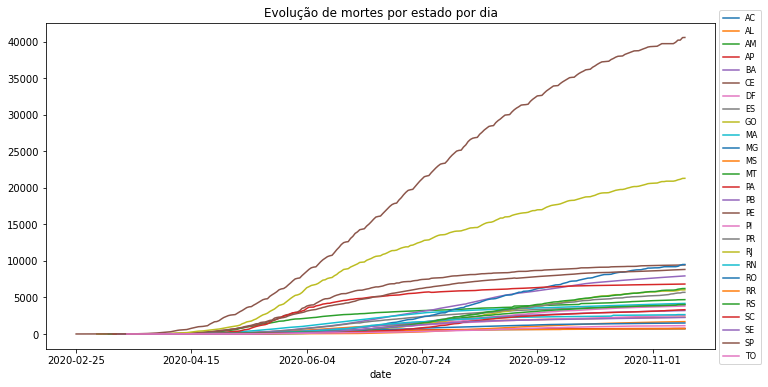

In [ ]:
caso_full_estado[['date', 'state', 'last_available_deaths']].set_index('date')
ax = caso_full_estado.pivot(index='date', columns='state', values='last_available_deaths').plot(figsize=(12,6))
ax.set_title('Evolução de mortes por estado por dia')
ax.legend(bbox_to_anchor=(1,1.05), fontsize=8)

Adicionando a densidade demográfica por estado:

In [ ]:
def density_state (row):
   if row['state'] == 'SP' :
      return '184.99'
   if row['state'] == 'ES' :
      return '87.22'
   if row['state'] == 'RJ' :
      return '394.62'
   if row['state'] == 'BA' :
      return '26.34'
   if row['state'] == 'DF' :
      return '523.4'
   if row['state'] == 'AL' :
      return '119.86'
   if row['state'] == 'MG' :
      return '36.09'
   if row['state'] == 'RS' :
      return '40.39'
   if row['state'] == 'GO' :
      return '20.63'
   if row['state'] == 'PB' :
      return '71.16'
   if row['state'] == 'PE' :
      return '97.45'
   if row['state'] == 'PR' :
      return '57.37'
   if row['state'] == 'RN' :
      return '66.41'
   if row['state'] == 'SC' :
      return '74.84'
   if row['state'] == 'AM' :
      return '2.66'
   if row['state'] == 'MS' :
      return '7.78'
   if row['state'] == 'SE' :
      return '104.83'
   if row['state'] == 'CE' :
      return '61.33'
   if row['state'] == 'AC' :
      return '5.37'
   if row['state'] == 'PA' :
      return '6.91'
   if row['state'] == 'TO' :
      return '5.66'
   if row['state'] == 'PI' :
      return '13.01'
   if row['state'] == 'AP' :
      return '5.94'
   if row['state'] == 'MA' :
      return '21.46'
   if row['state'] == 'MT' :
      return '3.86'
   if row['state'] == 'RO' :
      return '7.47'
   if row['state'] == 'RR' :
      return '2.70'
   return 'Other'

In [ ]:
caso_full_estado['density_state'] = caso_full_estado.apply(lambda row: density_state(row), axis=1)
caso_full_estado

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,state,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,new_confirmed,new_deaths,density_state
1,2020-02-25,SP,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0000,0,1,state,1,0,184.99
3,2020-02-26,SP,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0000,0,2,state,0,0,184.99
5,2020-02-27,SP,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-27,0.0000,0,3,state,0,0,184.99
7,2020-02-28,SP,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-28,0.0000,0,4,state,1,0,184.99
9,2020-02-29,SP,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-29,0.0000,0,5,state,0,0,184.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061198,2020-11-15,RS,47,11422973.0,11377239.0,True,False,278707,2439.88146,2020-11-15,0.0223,6219,251,state,1188,4,40.39
1061199,2020-11-15,SC,47,7252502.0,7164788.0,True,False,295946,4080.60556,2020-11-15,0.0112,3318,249,state,2144,9,74.84
1061200,2020-11-15,SE,47,2318822.0,2298696.0,True,False,86045,3710.72036,2020-11-15,0.0263,2259,247,state,65,2,104.83
1061201,2020-11-15,SP,47,46289333.0,45919049.0,True,False,1168640,2524.64212,2020-11-15,0.0347,40564,265,state,1218,15,184.99


##Por estado

Vendo o máximo de mortes por estado:

In [ ]:
(caso_full_estado[['state', 'new_deaths']].groupby('state').sum()).sort_values(by='new_deaths' ,ascending=False)

,new_deaths
state,
SP,40564
RJ,21294
MG,9507
CE,9439
PE,8827
BA,7943
PA,6832
RS,6219
GO,6035


Vamos ver agora quais foram a porcentagem do total de cada estado

In [ ]:
(caso_full_estado[['state', 'new_deaths']].groupby('state').sum() / caso_full_estado['new_deaths'].sum()).sort_values(by='new_deaths' ,ascending=False)

,new_deaths
state,
SP,0.244549
RJ,0.128375
MG,0.057315
CE,0.056905
PE,0.053215
BA,0.047886
PA,0.041188
RS,0.037493
GO,0.036383


Os oito primeiros estados que aparecem nessa lista são responsáveis por mais de 50% das mortes. Será que o comportamento deles pode nos dizer algo?

###Plotando os 8 primeiros estados

Criando o dataframe

In [ ]:
caso_full_estado_top8 = caso_full_estado[caso_full_estado['state'].isin(['SP', 'SP', 'RJ', 'MG', 'CE', 'PE', 'BA', 'PA', 'RS'])]
caso_full_estado_top8

,date,state,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,new_confirmed,new_deaths,density_state
1,2020-02-25,SP,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0000,0,1,state,1,0,184.99
3,2020-02-26,SP,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0000,0,2,state,0,0,184.99
5,2020-02-27,SP,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-27,0.0000,0,3,state,0,0,184.99
7,2020-02-28,SP,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-28,0.0000,0,4,state,1,0,184.99
9,2020-02-29,SP,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-29,0.0000,0,5,state,0,0,184.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061189,2020-11-15,PA,47,8690745.0,8602865.0,True,False,261899,3013.53912,2020-11-15,0.0261,6832,243,state,111,5,6.91
1061191,2020-11-15,PE,47,9616621.0,9557071.0,True,False,170860,1776.71554,2020-11-15,0.0517,8827,249,state,307,12,97.45
1061194,2020-11-15,RJ,47,17366189.0,17264943.0,True,False,326956,1882.71589,2020-11-15,0.0651,21294,256,state,311,10,394.62
1061198,2020-11-15,RS,47,11422973.0,11377239.0,True,False,278707,2439.88146,2020-11-15,0.0223,6219,251,state,1188,4,40.39


Plotando em escala log

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


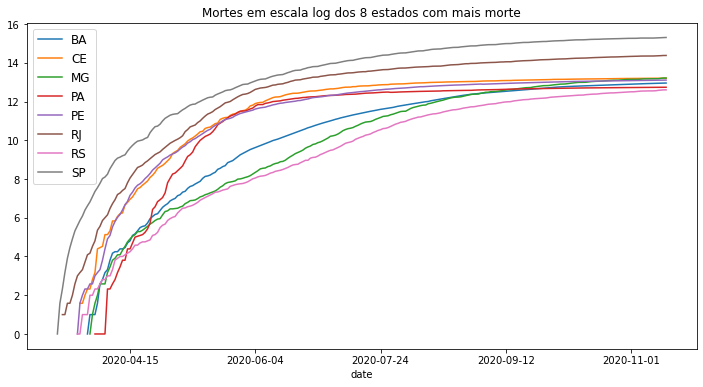

In [ ]:
caso_full_estado_top8['last_available_deaths_log'] = np.log2(caso_full_estado_top8['last_available_deaths'])
caso_full_estado_top8[['date', 'state', 'last_available_deaths_log']].set_index('date')
ax = caso_full_estado_top8.pivot(index='date', columns='state', values='last_available_deaths_log').plot(figsize=(12,6))
ax.set_title('Mortes em escala log dos 8 estados com mais morte')
ax.legend(loc='upper left', fontsize=12)

Vamos dar uma olhada nas médias móveis:

In [ ]:
df_ba = caso_full_estado_top8[caso_full_estado_top8['state'] == 'BA']
df_ba = df_ba[['date', 'state', 'new_deaths']].set_index('date')
df_ce = caso_full_estado_top8[caso_full_estado_top8['state'] == 'CE']
df_ce = df_ce[['date', 'state', 'new_deaths']].set_index('date')
df_mg = caso_full_estado_top8[caso_full_estado_top8['state'] == 'MG']
df_mg = df_mg[['date', 'state', 'new_deaths']].set_index('date')
df_pa = caso_full_estado_top8[caso_full_estado_top8['state'] == 'PA']
df_pa = df_pa[['date', 'state', 'new_deaths']].set_index('date')
df_pe = caso_full_estado_top8[caso_full_estado_top8['state'] == 'PE']
df_pe = df_pe[['date', 'state', 'new_deaths']].set_index('date')
df_rj = caso_full_estado_top8[caso_full_estado_top8['state'] == 'RJ']
df_rj = df_rj[['date', 'state', 'new_deaths']].set_index('date')
df_rs = caso_full_estado_top8[caso_full_estado_top8['state'] == 'RS']
df_rs = df_rs[['date', 'state', 'new_deaths']].set_index('date')
df_sp = caso_full_estado_top8[caso_full_estado_top8['state'] == 'SP']
df_sp = df_sp[['date', 'state', 'new_deaths']].set_index('date')

In [ ]:
for i in range(0,df_ba.shape[0]-6):
    df_ba.loc[df_ba.index[i+6],'SMA_7'] = np.round(((df_ba.iloc[i,1]+ df_ba.iloc[i+1,1] +df_ba.iloc[i+2,1]+df_ba.iloc[i+3,1]+df_ba.iloc[i+4,1]+df_ba.iloc[i+5,1]+df_ba.iloc[i+6,1])/7),1)
for i in range(0,df_ce.shape[0]-6):
    df_ce.loc[df_ce.index[i+6],'SMA_7'] = np.round(((df_ce.iloc[i,1]+ df_ce.iloc[i+1,1] +df_ce.iloc[i+2,1]+df_ce.iloc[i+3,1]+df_ce.iloc[i+4,1]+df_ce.iloc[i+5,1]+df_ce.iloc[i+6,1])/7),1)
for i in range(0,df_mg.shape[0]-6):
    df_mg.loc[df_mg.index[i+6],'SMA_7'] = np.round(((df_mg.iloc[i,1]+ df_mg.iloc[i+1,1] +df_mg.iloc[i+2,1]+df_mg.iloc[i+3,1]+df_mg.iloc[i+4,1]+df_mg.iloc[i+5,1]+df_mg.iloc[i+6,1])/7),1)
for i in range(0,df_pa.shape[0]-6):
    df_pa.loc[df_pa.index[i+6],'SMA_7'] = np.round(((df_pa.iloc[i,1]+ df_pa.iloc[i+1,1] +df_pa.iloc[i+2,1]+df_pa.iloc[i+3,1]+df_pa.iloc[i+4,1]+df_pa.iloc[i+5,1]+df_pa.iloc[i+6,1])/7),1)
for i in range(0,df_pe.shape[0]-6):
    df_pe.loc[df_pe.index[i+6],'SMA_7'] = np.round(((df_pe.iloc[i,1]+ df_pe.iloc[i+1,1] +df_pe.iloc[i+2,1]+df_pe.iloc[i+3,1]+df_pe.iloc[i+4,1]+df_pe.iloc[i+5,1]+df_pe.iloc[i+6,1])/7),1)
for i in range(0,df_rj.shape[0]-6):
    df_rj.loc[df_rj.index[i+6],'SMA_7'] = np.round(((df_rj.iloc[i,1]+ df_rj.iloc[i+1,1] +df_rj.iloc[i+2,1]+df_rj.iloc[i+3,1]+df_rj.iloc[i+4,1]+df_rj.iloc[i+5,1]+df_rj.iloc[i+6,1])/7),1)
for i in range(0,df_rs.shape[0]-6):
    df_rs.loc[df_rs.index[i+6],'SMA_7'] = np.round(((df_rs.iloc[i,1]+ df_rs.iloc[i+1,1] +df_rs.iloc[i+2,1]+df_rs.iloc[i+3,1]+df_rs.iloc[i+4,1]+df_rs.iloc[i+5,1]+df_rs.iloc[i+6,1])/7),1)
for i in range(0,df_sp.shape[0]-6):
    df_sp.loc[df_sp.index[i+6],'SMA_7'] = np.round(((df_sp.iloc[i,1]+ df_sp.iloc[i+1,1] +df_sp.iloc[i+2,1]+df_sp.iloc[i+3,1]+df_sp.iloc[i+4,1]+df_sp.iloc[i+5,1]+df_sp.iloc[i+6,1])/7),1)

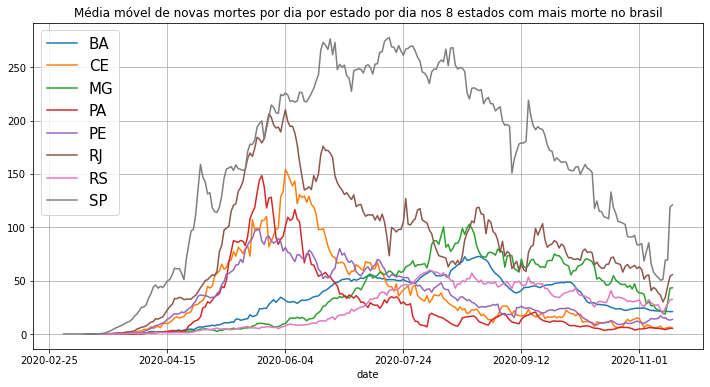

In [ ]:
result = pd.concat([df_ba, df_ce, df_mg, df_pa, df_pe, df_rj, df_rs, df_sp])
ax = result.pivot(columns='state', values='SMA_7').plot(figsize=(12,6))
ax.set_title('Média móvel de novas mortes por dia por estado por dia nos 8 estados com mais morte no brasil')
ax.grid(True)
ax.legend(loc='upper left', fontsize=15)

Algumas leituras:
- SP é o estado que mais destoa. Além do alto número de mortes, é possível ver que o pico dele foi alongado por mais dias, um comportamento totalmente diferente dos demais.
- Rio de Janeiro, Ceará, Pará e Pernambuco tiveram picos juntos logo no início da pandemia, e depois de um período caíram.
- Bahia, Minas Gerais e Rio Grande do Sul tiveram picos tardios, onde aparentemente a doença demorou mais tempo para se difundir e causar um alto número de mortes.

A pergunta é: por que? O que eles possuem em comum?

#Juntando por regiao

In [ ]:
caso_full_estado['state'].unique()

array(['SP', 'ES', 'RJ', 'BA', 'DF', 'AL', 'MG', 'RS', 'GO', 'PB', 'PE',
       'PR', 'RN', 'SC', 'AM', 'MS', 'SE', 'CE', 'AC', 'PA', 'TO', 'PI',
       'AP', 'MA', 'MT', 'RO', 'RR'], dtype=object)

In [ ]:
def region(row):
   if row['state'] == 'SP' :
     return 'Sudeste'
   if row['state'] == 'MG' :
     return 'Sudeste'
   if row['state'] == 'RJ' :
     return 'Sudeste'
   if row['state'] == 'ES' :
     return 'Sudeste'
   if row['state'] == 'PR' :
     return 'Sul'
   if row['state'] == 'SC' :
     return 'Sul'
   if row['state'] == 'RS' :
     return 'Sul'
   if row['state'] == 'MT' :
     return 'Centro-Oeste'
   if row['state'] == 'MS' :
     return 'Centro-Oeste'
   if row['state'] == 'DF' :
     return 'Centro-Oeste'
   if row['state'] == 'GO' :
     return 'Centro-Oeste'
   if row['state'] == 'AC' :
     return 'Norte'
   if row['state'] == 'AM' :
     return 'Norte'
   if row['state'] == 'AP' :
     return 'Norte'
   if row['state'] == 'PA' :
     return 'Norte'
   if row['state'] == 'RO' :
     return 'Norte'
   if row['state'] == 'RR' :
     return 'Norte'
   if row['state'] == 'TO' :
     return 'Norte'
   return 'Nordeste'

In [ ]:
caso_full_regiao = caso_full_estado.copy()

In [ ]:
caso_full_regiao['region'] = caso_full_regiao.apply(lambda row: region(row), axis=1)
caso_full_regiao = caso_full_regiao[['date', 'region','state', 'epidemiological_week', 'estimated_population',
       'estimated_population_2019', 'is_last', 'is_repeated',
       'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants', 'last_available_date',
       'last_available_death_rate', 'last_available_deaths', 'order_for_place',
       'place_type', 'new_confirmed', 'new_deaths']]
caso_full_regiao.head()

,date,region,state,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,new_confirmed,new_deaths
1,2020-02-25,Sudeste,SP,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0,0,1,state,1,0
3,2020-02-26,Sudeste,SP,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0,0,2,state,0,0
5,2020-02-27,Sudeste,SP,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-27,0.0,0,3,state,0,0
7,2020-02-28,Sudeste,SP,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-28,0.0,0,4,state,1,0
9,2020-02-29,Sudeste,SP,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-29,0.0,0,5,state,0,0


###Analisando dados do norte

In [ ]:
caso_full_regiao_norte = caso_full_regiao[caso_full_regiao['region'] == 'Norte']
caso_full_regiao_norte.head()

,date,region,state,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,new_confirmed,new_deaths
167,2020-03-13,Norte,AM,11,4207714.0,4144597.0,False,False,2,0.04753,2020-03-13,0.0,0,1,state,2,0
213,2020-03-14,Norte,AM,11,4207714.0,4144597.0,False,True,2,0.04753,2020-03-13,0.0,0,2,state,0,0
262,2020-03-15,Norte,AM,12,4207714.0,4144597.0,False,True,2,0.04753,2020-03-13,0.0,0,3,state,0,0
320,2020-03-16,Norte,AM,12,4207714.0,4144597.0,False,True,2,0.04753,2020-03-13,0.0,0,4,state,0,0
390,2020-03-17,Norte,AC,12,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,3,0


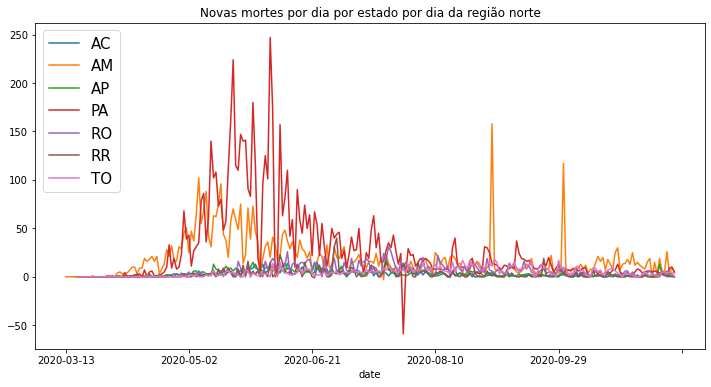

In [ ]:
caso_full_regiao_norte[['date', 'state', 'new_deaths']].set_index('date')
ax = caso_full_regiao_norte.pivot(index='date', columns='state', values='new_deaths').plot(figsize=(12,6))
ax.set_title('Novas mortes por dia por estado por dia da região norte')
ax.legend(loc='upper left', fontsize=15)

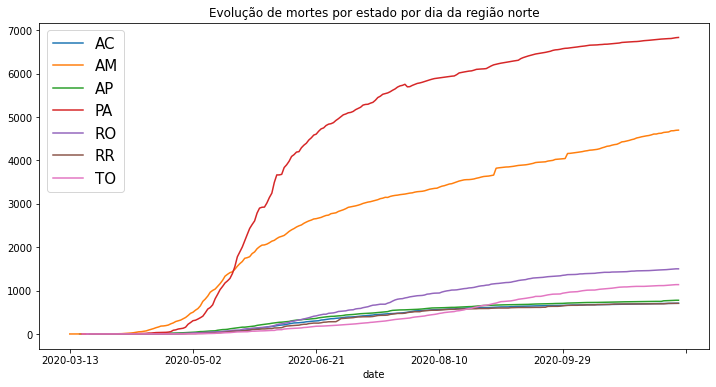

In [ ]:
caso_full_regiao_norte[['date', 'state', 'last_available_deaths']].set_index('date')
ax = caso_full_regiao_norte.pivot(index='date', columns='state', values='last_available_deaths').plot(figsize=(12,6))
ax.set_title('Evolução de mortes por estado por dia da região norte')
ax.legend(loc='upper left', fontsize=15)

Vamos ver esses dados em escala log

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


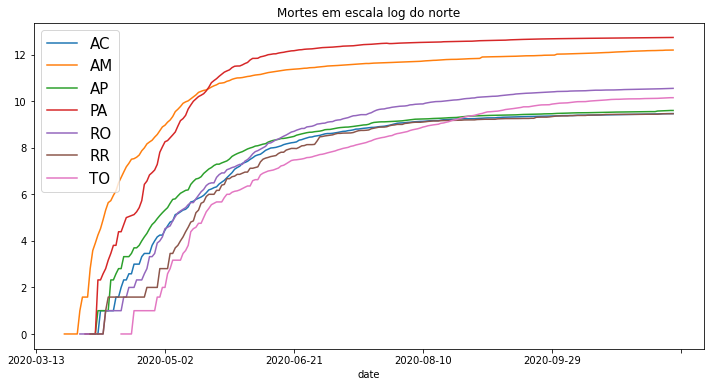

In [ ]:
caso_full_regiao_norte['last_available_deaths_log'] = np.log2(caso_full_regiao_norte['last_available_deaths'])
caso_full_regiao_norte[['date', 'state', 'last_available_deaths_log']].set_index('date')
ax = caso_full_regiao_norte.pivot(index='date', columns='state', values='last_available_deaths_log').plot(figsize=(12,6))
ax.set_title('Mortes em escala log do norte')
ax.legend(loc='upper left', fontsize=15)

E agora em médias móveis de 7 dias

In [ ]:
df_ac = caso_full_regiao_norte[caso_full_regiao_norte['state'] == 'AC']
df_ac = df_ac[['date', 'state', 'new_deaths']].set_index('date')
df_am = caso_full_regiao_norte[caso_full_regiao_norte['state'] == 'AM']
df_am = df_am[['date', 'state', 'new_deaths']].set_index('date')
df_ap = caso_full_regiao_norte[caso_full_regiao_norte['state'] == 'AP']
df_ap = df_ap[['date', 'state', 'new_deaths']].set_index('date')
df_pa = caso_full_regiao_norte[caso_full_regiao_norte['state'] == 'PA']
df_pa = df_pa[['date', 'state', 'new_deaths']].set_index('date')
df_ro = caso_full_regiao_norte[caso_full_regiao_norte['state'] == 'RO']
df_ro = df_ro[['date', 'state', 'new_deaths']].set_index('date')
df_rr = caso_full_regiao_norte[caso_full_regiao_norte['state'] == 'RR']
df_rr = df_rr[['date', 'state', 'new_deaths']].set_index('date')
df_to = caso_full_regiao_norte[caso_full_regiao_norte['state'] == 'TO']
df_to = df_to[['date', 'state', 'new_deaths']].set_index('date')

In [ ]:
for i in range(0,df_ac.shape[0]-6):
    df_ac.loc[df_ac.index[i+6],'SMA_7'] = np.round(((df_ac.iloc[i,1]+ df_ac.iloc[i+1,1] +df_ac.iloc[i+2,1]+df_ac.iloc[i+3,1]+df_ac.iloc[i+4,1]+df_ac.iloc[i+5,1]+df_ac.iloc[i+6,1])/7),1)
for i in range(0,df_am.shape[0]-6):
    df_am.loc[df_am.index[i+6],'SMA_7'] = np.round(((df_am.iloc[i,1]+ df_am.iloc[i+1,1] +df_am.iloc[i+2,1]+df_am.iloc[i+3,1]+df_am.iloc[i+4,1]+df_am.iloc[i+5,1]+df_am.iloc[i+6,1])/7),1)
for i in range(0,df_ap.shape[0]-6):
    df_ap.loc[df_ap.index[i+6],'SMA_7'] = np.round(((df_ap.iloc[i,1]+ df_ap.iloc[i+1,1] +df_ap.iloc[i+2,1]+df_ap.iloc[i+3,1]+df_ap.iloc[i+4,1]+df_ap.iloc[i+5,1]+df_ap.iloc[i+6,1])/7),1)
for i in range(0,df_pa.shape[0]-6):
    df_pa.loc[df_pa.index[i+6],'SMA_7'] = np.round(((df_pa.iloc[i,1]+ df_pa.iloc[i+1,1] +df_pa.iloc[i+2,1]+df_pa.iloc[i+3,1]+df_pa.iloc[i+4,1]+df_pa.iloc[i+5,1]+df_pa.iloc[i+6,1])/7),1)
for i in range(0,df_rr.shape[0]-6):
    df_rr.loc[df_rr.index[i+6],'SMA_7'] = np.round(((df_rr.iloc[i,1]+ df_rr.iloc[i+1,1] +df_rr.iloc[i+2,1]+df_rr.iloc[i+3,1]+df_rr.iloc[i+4,1]+df_rr.iloc[i+5,1]+df_rr.iloc[i+6,1])/7),1)
for i in range(0,df_ro.shape[0]-6):
    df_ro.loc[df_ro.index[i+6],'SMA_7'] = np.round(((df_ro.iloc[i,1]+ df_ro.iloc[i+1,1] +df_ro.iloc[i+2,1]+df_ro.iloc[i+3,1]+df_ro.iloc[i+4,1]+df_ro.iloc[i+5,1]+df_ro.iloc[i+6,1])/7),1)
for i in range(0,df_to.shape[0]-6):
    df_to.loc[df_to.index[i+6],'SMA_7'] = np.round(((df_to.iloc[i,1]+ df_to.iloc[i+1,1] +df_to.iloc[i+2,1]+df_to.iloc[i+3,1]+df_to.iloc[i+4,1]+df_to.iloc[i+5,1]+df_to.iloc[i+6,1])/7),1)

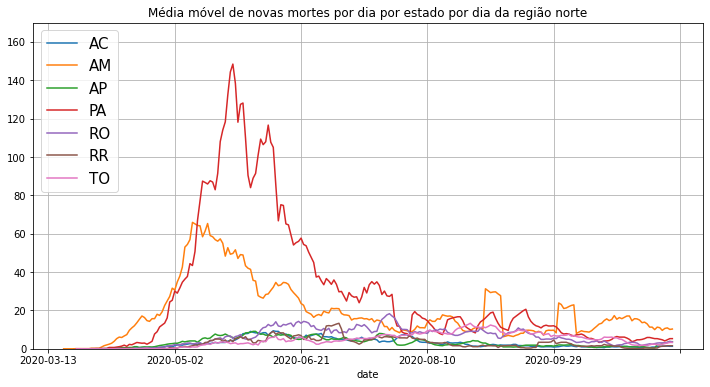

In [ ]:
result = pd.concat([df_ac, df_am, df_ap, df_pa, df_rr, df_ro, df_to])
ax = result.pivot(columns='state', values='SMA_7').plot(figsize=(12,6), ylim=(0,170))
ax.set_title('Média móvel de novas mortes por dia por estado por dia da região norte')
ax.grid(True)
ax.legend(loc='upper left', fontsize=15)

###Analisando os dados do sudeste

In [ ]:
caso_full_regiao_sudeste = caso_full_regiao[caso_full_regiao['region'] == 'Sudeste']
caso_full_regiao_sudeste.head()

,date,region,state,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,new_confirmed,new_deaths
1,2020-02-25,Sudeste,SP,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0,0,1,state,1,0
3,2020-02-26,Sudeste,SP,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0,0,2,state,0,0
5,2020-02-27,Sudeste,SP,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-27,0.0,0,3,state,0,0
7,2020-02-28,Sudeste,SP,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-28,0.0,0,4,state,1,0
9,2020-02-29,Sudeste,SP,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-29,0.0,0,5,state,0,0


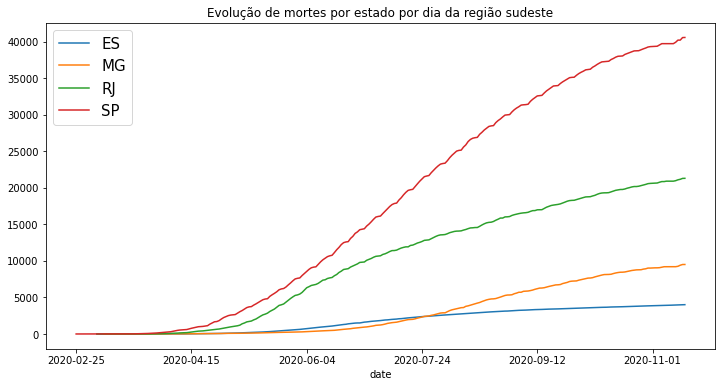

In [ ]:
caso_full_regiao_sudeste[['date', 'state', 'last_available_deaths']].set_index('date')
ax = caso_full_regiao_sudeste.pivot(index='date', columns='state', values='last_available_deaths').plot(figsize=(12,6))
ax.set_title('Evolução de mortes por estado por dia da região sudeste')
ax.legend(loc='upper left', fontsize=15)

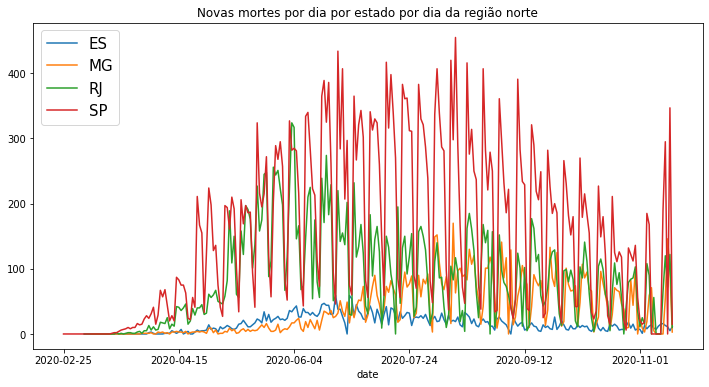

In [ ]:
caso_full_regiao_sudeste[['date', 'state', 'new_deaths']].set_index('date')
ax = caso_full_regiao_sudeste.pivot(index='date', columns='state', values='new_deaths').plot(figsize=(12,6))
ax.set_title('Novas mortes por dia por estado por dia da região norte')
ax.legend(loc='upper left', fontsize=15)

Mortes em por dia em escala log:

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


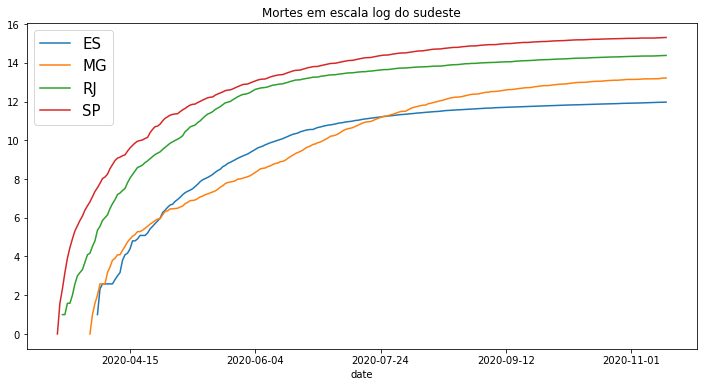

In [ ]:
caso_full_regiao_sudeste['last_available_deaths_log'] = np.log2(caso_full_regiao_sudeste['last_available_deaths'])
caso_full_regiao_sudeste[['date', 'state', 'last_available_deaths_log']].set_index('date')
ax = caso_full_regiao_sudeste.pivot(index='date', columns='state', values='last_available_deaths_log').plot(figsize=(12,6))
ax.set_title('Mortes em escala log do sudeste')
ax.legend(loc='upper left', fontsize=15)

Vou tentar transformar esse gráfico em média móvel de 7 dias.

In [ ]:
df_sp = caso_full_regiao_sudeste[caso_full_regiao_sudeste['state'] == 'SP']
df_sp = df_sp[['date', 'state', 'new_deaths']].set_index('date')
df_mg = caso_full_regiao_sudeste[caso_full_regiao_sudeste['state'] == 'MG']
df_mg = df_mg[['date', 'state', 'new_deaths']].set_index('date')
df_rj = caso_full_regiao_sudeste[caso_full_regiao_sudeste['state'] == 'RJ']
df_rj = df_rj[['date', 'state', 'new_deaths']].set_index('date')
df_es = caso_full_regiao_sudeste[caso_full_regiao_sudeste['state'] == 'ES']
df_es = df_es[['date', 'state', 'new_deaths']].set_index('date')

In [ ]:
for i in range(0,df_sp.shape[0]-6):
    df_sp.loc[df_sp.index[i+6],'SMA_7'] = np.round(((df_sp.iloc[i,1]+ df_sp.iloc[i+1,1] +df_sp.iloc[i+2,1]+df_sp.iloc[i+3,1]+df_sp.iloc[i+4,1]+df_sp.iloc[i+5,1]+df_sp.iloc[i+6,1])/7),1)
for i in range(0,df_mg.shape[0]-6):
    df_mg.loc[df_mg.index[i+6],'SMA_7'] = np.round(((df_mg.iloc[i,1]+ df_mg.iloc[i+1,1] +df_mg.iloc[i+2,1]+df_mg.iloc[i+3,1]+df_mg.iloc[i+4,1]+df_mg.iloc[i+5,1]+df_mg.iloc[i+6,1])/7),1)
for i in range(0,df_es.shape[0]-6):
    df_es.loc[df_es.index[i+6],'SMA_7'] = np.round(((df_es.iloc[i,1]+ df_es.iloc[i+1,1] +df_es.iloc[i+2,1]+df_es.iloc[i+3,1]+df_es.iloc[i+4,1]+df_es.iloc[i+5,1]+df_es.iloc[i+6,1])/7),1)
for i in range(0,df_rj.shape[0]-6):
    df_rj.loc[df_rj.index[i+6],'SMA_7'] = np.round(((df_rj.iloc[i,1]+ df_rj.iloc[i+1,1] +df_rj.iloc[i+2,1]+df_rj.iloc[i+3,1]+df_rj.iloc[i+4,1]+df_rj.iloc[i+5,1]+df_rj.iloc[i+6,1])/7),1)

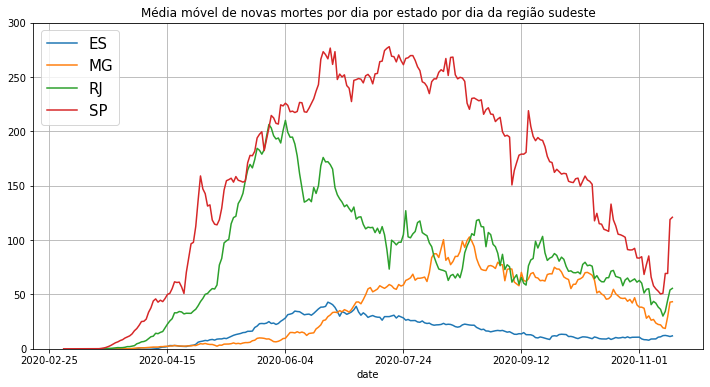

In [ ]:
result = pd.concat([df_sp, df_es, df_mg, df_rj])
ax = result.pivot(columns='state', values='SMA_7').plot(figsize=(12,6), ylim=(0,300))
ax.set_title('Média móvel de novas mortes por dia por estado por dia da região sudeste')
ax.grid(True)
ax.legend(loc='upper left', fontsize=15)

##Possibilidade: a segunda onda

Notei que os estados do norte e do sudeste - entre os estados mais afetados do br - tiveram comportamentos muito diferentes. Vou plotar todas as regiões para saber como isso se comporta nas demais.

##Criando um dataset por cidade

In [ ]:
caso_full_cidade = pd.concat([caso_full, caso_full_estado, caso_full_estado]).drop_duplicates(keep=False)
caso_full_cidade = caso_full_cidade[caso_full_cidade['city'].notna()]
caso_full_cidade

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,density_state
0,São Paulo,3550308.0,2020-02-25,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0000,0,1,city,SP,1,0,NaN
2,São Paulo,3550308.0,2020-02-26,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0000,0,2,city,SP,0,0,NaN
4,São Paulo,3550308.0,2020-02-27,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0000,0,3,city,SP,0,0,NaN
6,São Paulo,3550308.0,2020-02-28,9,12325232.0,12252023.0,False,False,2,0.01623,2020-02-28,0.0000,0,4,city,SP,1,0,NaN
8,São Paulo,3550308.0,2020-02-29,9,12325232.0,12252023.0,False,False,2,0.01623,2020-02-29,0.0000,0,5,city,SP,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061171,Tocantínia,1721109.0,2020-11-15,47,7617.0,7545.0,False,True,413,5422.08218,2020-11-14,0.0121,5,181,city,TO,0,0,NaN
1061172,Tupirama,1721257.0,2020-11-15,47,1922.0,1891.0,False,True,97,5046.82622,2020-11-14,0.0206,2,177,city,TO,0,0,NaN
1061173,Tupiratins,1721307.0,2020-11-15,47,2729.0,2671.0,False,True,18,659.58226,2020-11-14,0.0000,0,177,city,TO,0,0,NaN
1061174,Wanderlândia,1722081.0,2020-11-15,47,11734.0,11683.0,False,True,365,3110.61871,2020-11-14,0.0137,5,202,city,TO,0,0,NaN


#Dataset caso

In [ ]:
caso = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Science - Alura 2020/Módulo 1 - Dados SUS/Projeto Final/caso.csv')
caso.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-15,AP,NaN,state,54979,777,236,True,845731.0,861773.0,16.0,6379.75430,0.0141
1,2020-11-14,AP,NaN,state,54838,777,235,False,845731.0,861773.0,16.0,6363.39268,0.0142
2,2020-11-13,AP,NaN,state,54417,774,234,False,845731.0,861773.0,16.0,6314.53991,0.0142
3,2020-11-12,AP,NaN,state,54056,771,233,False,845731.0,861773.0,16.0,6272.64953,0.0143
4,2020-11-11,AP,NaN,state,53790,770,232,False,845731.0,861773.0,16.0,6241.78293,0.0143


In [ ]:
caso_state = caso[caso['city'].isna()]
caso_state

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-15,AP,NaN,state,54979,777,236,True,845731.0,861773.0,16.0,6379.75430,0.0141
1,2020-11-14,AP,NaN,state,54838,777,235,False,845731.0,861773.0,16.0,6363.39268,0.0142
2,2020-11-13,AP,NaN,state,54417,774,234,False,845731.0,861773.0,16.0,6314.53991,0.0142
3,2020-11-12,AP,NaN,state,54056,771,233,False,845731.0,861773.0,16.0,6272.64953,0.0143
4,2020-11-11,AP,NaN,state,53790,770,232,False,845731.0,861773.0,16.0,6241.78293,0.0143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
856945,2020-02-29,SP,NaN,state,2,0,5,False,45919049.0,46289333.0,35.0,0.00432,0.0000
856946,2020-02-28,SP,NaN,state,2,0,4,False,45919049.0,46289333.0,35.0,0.00432,0.0000
856947,2020-02-27,SP,NaN,state,1,0,3,False,45919049.0,46289333.0,35.0,0.00216,0.0000
856948,2020-02-26,SP,NaN,state,1,0,2,False,45919049.0,46289333.0,35.0,0.00216,0.0000


In [ ]:
caso_state['state'].unique()

array(['AP', 'AC', 'AM', 'DF', 'AL', 'ES', 'CE', 'GO', 'BA', 'MS', 'MA',
       'MT', 'PA', 'PB', 'MG', 'RJ', 'PE', 'PI', 'PR', 'RR', 'RO', 'RN',
       'RS', 'SE', 'TO', 'SC', 'SP'], dtype=object)

In [ ]:
caso_state['city_ibge_code'].unique()

array([16., 12., 13., 53., 27., 32., 23., 52., 29., 50., 21., 51., 15.,
       25., 31., 33., 26., 22., 41., 14., 11., 24., 43., 28., 17., 42.,
       35.])

Códigos: 16. AP, 12. AC, 13. AM, 53. DF, 27. AL, 32. ES, 23. CE, 52. GO, 29. BA, 50. MS, 21. MA, 51. MT, 15. PA, 25. PB, 31. MG, 33. RJ, 26. PE, 22. PI, 41. PR, 14. RR, 11. RO, 24. RN, 43. RS, 28. SE, 17. TO, 42. SC, 35. SP

In [ ]:
caso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974824 entries, 0 to 974823
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            974824 non-null  object 
 1   state                           974824 non-null  object 
 2   city                            968230 non-null  object 
 3   place_type                      974824 non-null  object 
 4   confirmed                       974824 non-null  int64  
 5   deaths                          974824 non-null  int64  
 6   order_for_place                 974824 non-null  int64  
 7   is_last                         974824 non-null  bool   
 8   estimated_population_2019       971052 non-null  float64
 9   estimated_population            971052 non-null  float64
 10  city_ibge_code                  971052 non-null  float64
 11  confirmed_per_100k_inhabitants  957481 non-null  float64
 12  death_rate      

#Dataset obito_cartorio

In [ ]:
obito_cartorio = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Science - Alura 2020/Módulo 1 - Dados SUS/Projeto Final/obito_cartorio.csv')
obito_cartorio

,date,state,epidemiological_week_2019,epidemiological_week_2020,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,new_deaths_indeterminate_2019,new_deaths_respiratory_failure_2019,new_deaths_others_2019,new_deaths_pneumonia_2019,new_deaths_septicemia_2019,new_deaths_sars_2019,new_deaths_covid19,new_deaths_indeterminate_2020,new_deaths_respiratory_failure_2020,new_deaths_others_2020,new_deaths_pneumonia_2020,new_deaths_septicemia_2020,new_deaths_sars_2020,new_deaths_total_2019,new_deaths_total_2020
0,2020-01-01,AC,1,1,0,2,4,3,1,0,0,1,1,7,2,2,0,10,13,NaN,2.0,4.0,3.0,1.0,NaN,NaN,1.0,1.0,7.0,2.0,2.0,NaN,10,13.0
1,2020-01-02,AC,1,1,0,2,10,3,2,0,0,1,1,13,4,4,0,17,23,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,6.0,2.0,2.0,NaN,7,10.0
2,2020-01-03,AC,1,1,0,2,16,3,4,0,0,1,1,21,7,6,0,25,36,NaN,NaN,6.0,NaN,2.0,NaN,NaN,NaN,NaN,8.0,3.0,2.0,NaN,8,13.0
3,2020-01-04,AC,1,1,0,2,18,6,5,0,0,1,2,25,7,7,0,31,42,NaN,NaN,2.0,3.0,1.0,NaN,NaN,NaN,1.0,4.0,NaN,1.0,NaN,6,6.0
4,2020-01-05,AC,1,2,0,2,24,7,5,0,0,1,3,29,11,7,0,38,51,NaN,NaN,6.0,1.0,NaN,NaN,NaN,NaN,1.0,4.0,4.0,NaN,NaN,7,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9877,2020-12-27,TO,52,53,48,446,3108,885,510,7,788,41,377,2686,668,473,24,5004,5057,NaN,NaN,9.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN
9878,2020-12-28,TO,52,53,48,448,3115,887,511,7,788,41,377,2686,668,473,24,5016,5057,NaN,2.0,7.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN
9879,2020-12-29,TO,1,53,48,448,3123,891,513,8,788,41,377,2686,668,473,24,5031,5057,NaN,NaN,8.0,4.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN
9880,2020-12-30,TO,1,53,48,451,3133,893,514,8,788,41,377,2686,668,473,24,5047,5057,NaN,3.0,10.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN


In [ ]:
obito_cartorio.columns

Index(['date', 'state', 'epidemiological_week_2019',
       'epidemiological_week_2020', 'deaths_indeterminate_2019',
       'deaths_respiratory_failure_2019', 'deaths_others_2019',
       'deaths_pneumonia_2019', 'deaths_septicemia_2019', 'deaths_sars_2019',
       'deaths_covid19', 'deaths_indeterminate_2020',
       'deaths_respiratory_failure_2020', 'deaths_others_2020',
       'deaths_pneumonia_2020', 'deaths_septicemia_2020', 'deaths_sars_2020',
       'deaths_total_2019', 'deaths_total_2020',
       'new_deaths_indeterminate_2019', 'new_deaths_respiratory_failure_2019',
       'new_deaths_others_2019', 'new_deaths_pneumonia_2019',
       'new_deaths_septicemia_2019', 'new_deaths_sars_2019',
       'new_deaths_covid19', 'new_deaths_indeterminate_2020',
       'new_deaths_respiratory_failure_2020', 'new_deaths_others_2020',
       'new_deaths_pneumonia_2020', 'new_deaths_septicemia_2020',
       'new_deaths_sars_2020', 'new_deaths_total_2019',
       'new_deaths_total_2020'],
    

#Dataset Tres pontas

In [ ]:
caso_full_tp = caso_full_cidade[caso_full_cidade['city'] == 'Três Pontas'].reset_index(drop=True)
caso_full_tp

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,density_state
0,Três Pontas,3169406.0,2020-04-18,16,56940.0,56746.0,False,False,1,1.75623,2020-04-18,1.0000,1,1,city,MG,1,1,NaN
1,Três Pontas,3169406.0,2020-04-19,17,56940.0,56746.0,False,False,2,3.51247,2020-04-19,0.5000,1,2,city,MG,1,0,NaN
2,Três Pontas,3169406.0,2020-04-20,17,56940.0,56746.0,False,False,2,3.51247,2020-04-20,0.5000,1,3,city,MG,0,0,NaN
3,Três Pontas,3169406.0,2020-04-21,17,56940.0,56746.0,False,False,2,3.51247,2020-04-21,0.5000,1,4,city,MG,0,0,NaN
4,Três Pontas,3169406.0,2020-04-22,17,56940.0,56746.0,False,False,2,3.51247,2020-04-22,0.5000,1,5,city,MG,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Três Pontas,3169406.0,2020-11-11,46,56940.0,56746.0,False,True,783,1375.13172,2020-11-10,0.0179,14,208,city,MG,0,0,NaN
208,Três Pontas,3169406.0,2020-11-12,46,56940.0,56746.0,False,False,807,1417.28135,2020-11-12,0.0173,14,209,city,MG,24,0,NaN
209,Três Pontas,3169406.0,2020-11-13,46,56940.0,56746.0,False,False,814,1429.57499,2020-11-13,0.0172,14,210,city,MG,7,0,NaN
210,Três Pontas,3169406.0,2020-11-14,46,56940.0,56746.0,True,False,814,1429.57499,2020-11-14,0.0172,14,211,city,MG,0,0,NaN


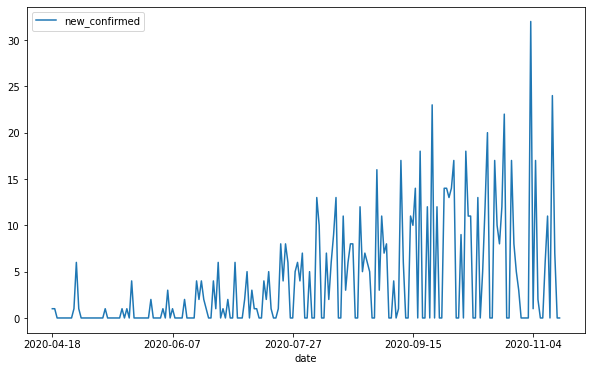

In [ ]:
ax = caso_full_tp[['date', 'city', 'new_confirmed']].set_index('date').plot(figsize=(10,6))
ax

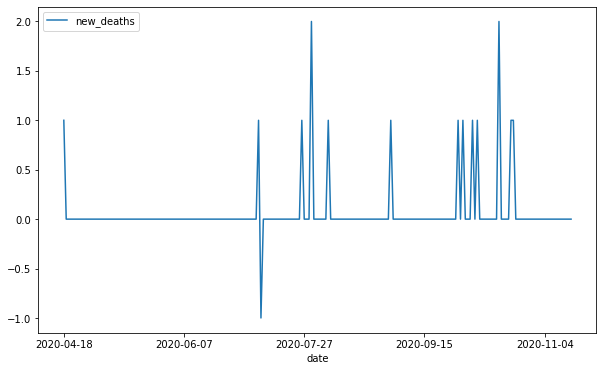

In [ ]:
ax = caso_full_tp[['date', 'city', 'new_deaths']].set_index('date').plot(figsize=(10,6))
ax

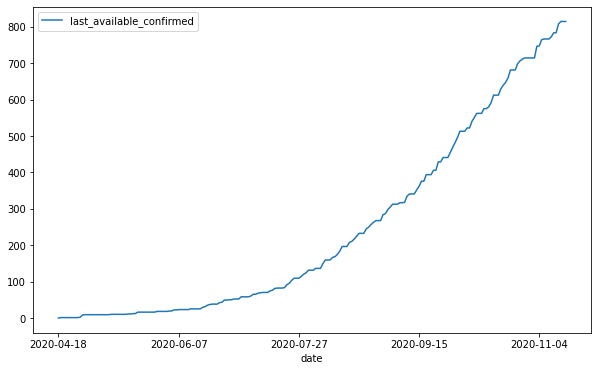

In [ ]:
ax = caso_full_tp[['date', 'city', 'last_available_confirmed']].set_index('date').plot(figsize=(10,6))
ax

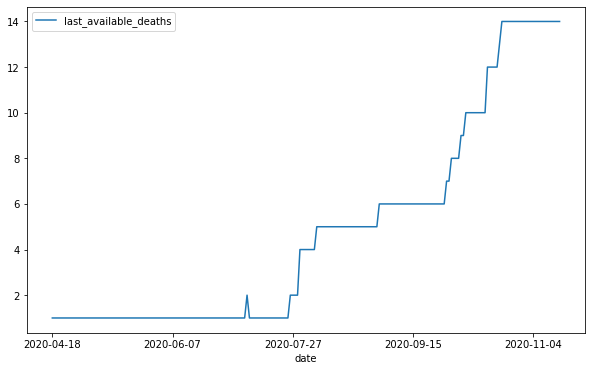

In [ ]:
ax = caso_full_tp[['date', 'city', 'last_available_deaths']].set_index('date').plot(figsize=(10,6))
ax

#Ideia: plotar gráfico de cidades com menos de 100k habitantes e comparar com cidades grandes

In [ ]:
caso_full_cidadesmenores = caso_full_cidade[caso_full_cidade['estimated_population'] < 100000].reset_index(drop=True)
caso_full_cidadesmenores

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,density_state
0,Campo Bom,4303905.0,2020-03-10,11,69458.0,66712.0,False,False,1,1.43972,2020-03-10,0.0000,0,1,city,RS,1,0,NaN
1,Campo Bom,4303905.0,2020-03-11,11,69458.0,66712.0,False,False,1,1.43972,2020-03-11,0.0000,0,2,city,RS,0,0,NaN
2,Cianorte,4105508.0,2020-03-12,11,83816.0,82620.0,False,False,1,1.19309,2020-03-12,0.0000,0,1,city,PR,1,0,NaN
3,Campo Bom,4303905.0,2020-03-12,11,69458.0,66712.0,False,False,1,1.43972,2020-03-12,0.0000,0,3,city,RS,0,0,NaN
4,Cianorte,4105508.0,2020-03-13,11,83816.0,82620.0,False,False,1,1.19309,2020-03-13,0.0000,0,2,city,PR,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974343,Tocantínia,1721109.0,2020-11-15,47,7617.0,7545.0,False,True,413,5422.08218,2020-11-14,0.0121,5,181,city,TO,0,0,NaN
974344,Tupirama,1721257.0,2020-11-15,47,1922.0,1891.0,False,True,97,5046.82622,2020-11-14,0.0206,2,177,city,TO,0,0,NaN
974345,Tupiratins,1721307.0,2020-11-15,47,2729.0,2671.0,False,True,18,659.58226,2020-11-14,0.0000,0,177,city,TO,0,0,NaN
974346,Wanderlândia,1722081.0,2020-11-15,47,11734.0,11683.0,False,True,365,3110.61871,2020-11-14,0.0137,5,202,city,TO,0,0,NaN


Separando as cidades pelos estados:

In [ ]:
caso_full_cidadesmenores_mg = caso_full_cidadesmenores[caso_full_cidadesmenores['state'] == "MG"]
caso_full_cidadesmenores_sp = caso_full_cidadesmenores[caso_full_cidadesmenores['state'] == "SP"]
caso_full_cidadesmenores_rj = caso_full_cidadesmenores[caso_full_cidadesmenores['state'] == "RJ"]
caso_full_cidadesmenores_es = caso_full_cidadesmenores[caso_full_cidadesmenores['state'] == "ES"]

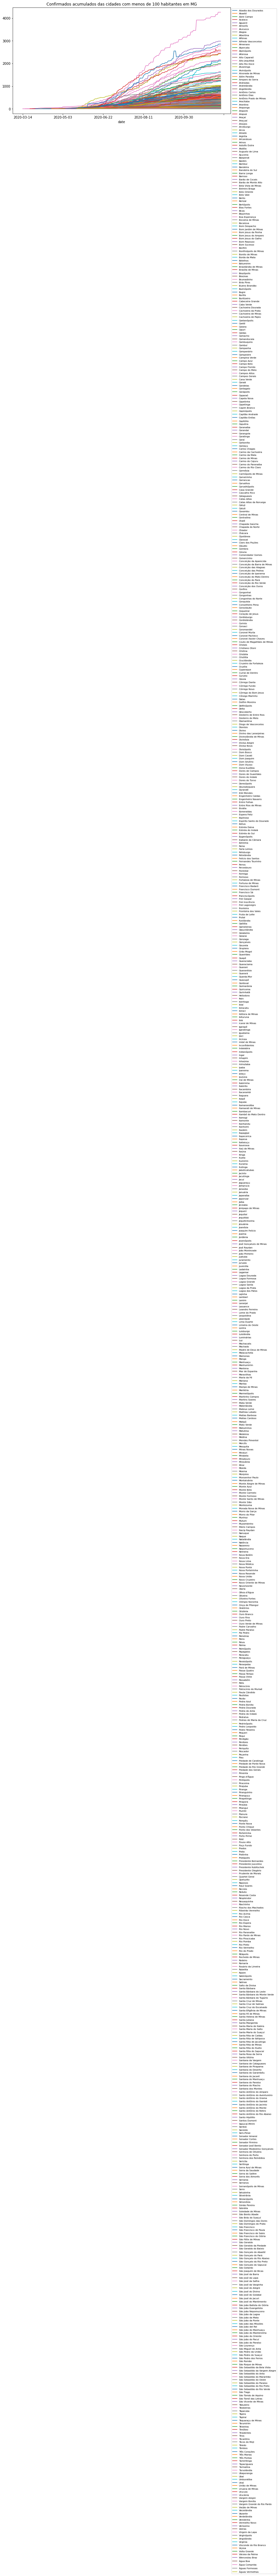

In [ ]:
ax = caso_full_cidadesmenores_mg.pivot(index='date', columns='city', values='last_available_confirmed').plot(figsize=(12,6))
ax.set_title('Confirmados acumulados das cidades com menos de 100 habitantes em MG')
ax.legend(bbox_to_anchor=(1,1), fontsize=7)

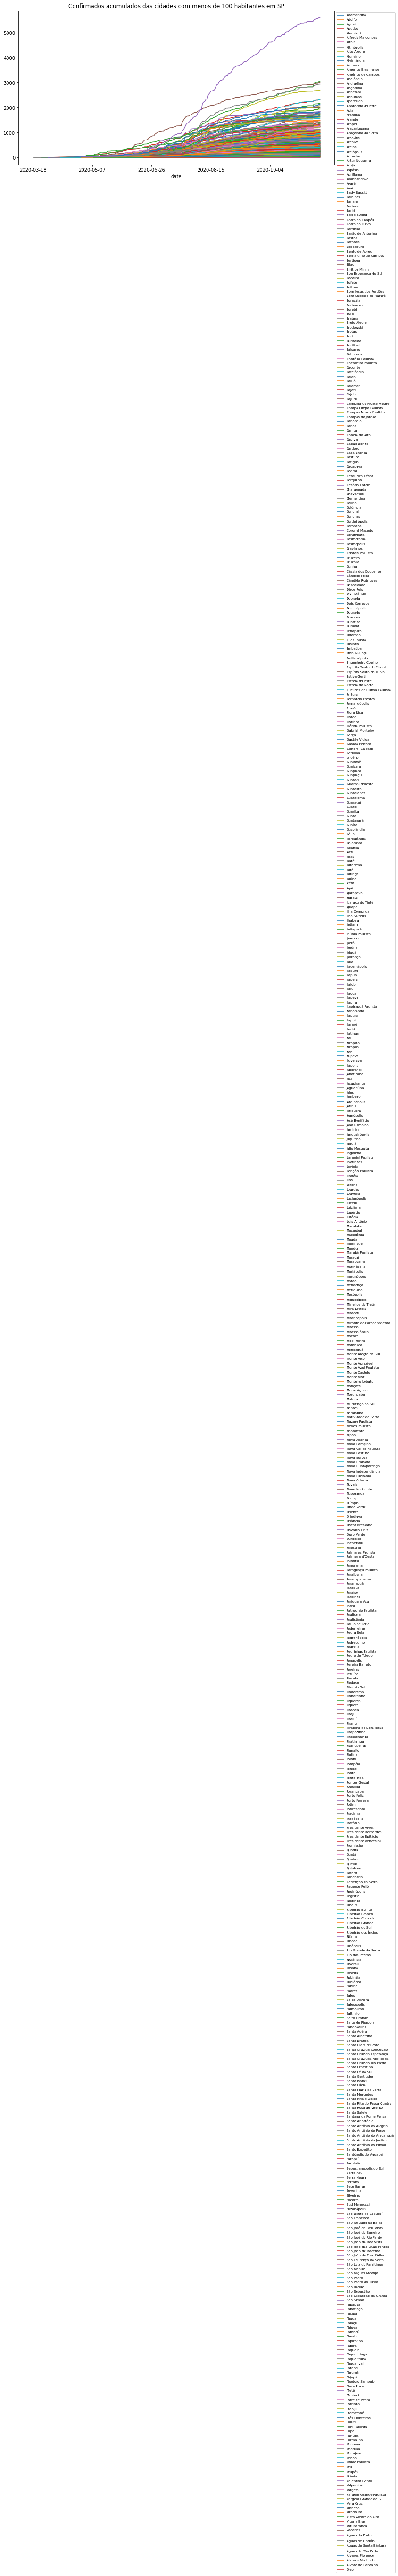

In [ ]:
ax = caso_full_cidadesmenores_sp.pivot(index='date', columns='city', values='last_available_confirmed').plot(figsize=(12,6))
ax.set_title('Confirmados acumulados das cidades com menos de 100 habitantes em SP')
ax.legend(bbox_to_anchor=(1,1), fontsize=7)

#Correlacionando com densidade

##Por estado

In [ ]:
caso_full_estado_newdeaths = caso_full_estado[['state', 'new_deaths']].groupby('state').sum('new_deaths')
caso_full_estado_density = caso_full_estado[['state', 'density_state']].drop_duplicates()
caso_full_estado_newdeaths_density = pd.merge(caso_full_estado_newdeaths, caso_full_estado_density, on="state")
caso_full_estado_newdeaths_density.sort_values('new_deaths', ascending=False)

,state,new_deaths,density_state
25,SP,40564,184.99
18,RJ,21294,394.62
10,MG,9507,36.09
5,CE,9439,61.33
15,PE,8827,97.45
4,BA,7943,26.34
13,PA,6832,6.91
22,RS,6219,40.39
8,GO,6035,20.63
17,PR,5697,57.37


Talvez por estado seja muito abrangente, vamos tentar por cidade. Mas já podemos ver que o topo possui mais estados com maiores densidades e a calda mais estados com menores densidades.

##Densidade por cidade

###Importando e arrumando o dataset

In [ ]:
dados_densidade_city = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Science - Alura 2020/Módulo 1 - Dados SUS/Projeto Final/densidade demográfica por cidade (2010).csv',
                                   skiprows=3, skipfooter=32, sep=';',
                                   decimal=',')
dados_densidade_city

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Município,2010
0,Alta Floresta D'Oeste (RO),3.45
1,Ariquemes (RO),20.41
2,Cabixi (RO),4.80
3,Cacoal (RO),20.72
4,Cerejeiras (RO),6.12
...,...,...
5551,Trombas (GO),4.32
5552,Turvânia (GO),10.06
5553,Turvelândia (GO),4.71
5554,Uirapuru (GO),2.54


In [ ]:
dados_densidade_city['Município'] = dados_densidade_city['Município'].str[:-5]
dados_densidade_city

,Município,2010
0,Alta Floresta D'Oeste,3.45
1,Ariquemes,20.41
2,Cabixi,4.80
3,Cacoal,20.72
4,Cerejeiras,6.12
...,...,...
5551,Trombas,4.32
5552,Turvânia,10.06
5553,Turvelândia,4.71
5554,Uirapuru,2.54


##Juntando datasets

In [ ]:
caso_full_cidade_totaldeaths = (caso_full_cidade[['city', 'new_deaths']].groupby('city').sum()).sort_values(by='new_deaths' ,ascending=False)
caso_full_cidade_totaldeaths = caso_full_cidade_totaldeaths[caso_full_cidade_totaldeaths['new_deaths'] != 0]
caso_full_cidade_totaldeaths = caso_full_cidade_totaldeaths.reset_index()
caso_full_cidade_totaldeaths.head()

,city,new_deaths
0,São Paulo,13952
1,Rio de Janeiro,12064
2,Fortaleza,3917
3,Brasília,3498
4,Salvador,2938


In [ ]:
caso_full_cidade_totaldeaths

,city,new_deaths
0,São Paulo,13952
1,Rio de Janeiro,12064
2,Fortaleza,3917
3,Brasília,3498
4,Salvador,2938
...,...,...
4547,Iati,1
4548,Hulha Negra,1
4549,Quatro Pontes,1
4550,Itiquira,1


In [ ]:
dados_densidade_city['city'] = dados_densidade_city['Município']
dados_densidade_city = dados_densidade_city.drop(columns='Município')
dados_densidade_city = dados_densidade_city.set_index('city', drop=True)
dados_densidade_city['densidade'] = dados_densidade_city['2010']
dados_densidade_city = dados_densidade_city.drop(columns='2010')
dados_densidade_city.head()

,densidade
city,
Alta Floresta D'Oeste,3.45
Ariquemes,20.41
Cabixi,4.80
Cacoal,20.72
Cerejeiras,6.12


In [ ]:
dados_densidade_city = dados_densidade_city.reset_index()
dados_densidade_city

,city,densidade
0,Alta Floresta D'Oeste,3.45
1,Ariquemes,20.41
2,Cabixi,4.80
3,Cacoal,20.72
4,Cerejeiras,6.12
...,...,...
5551,Trombas,4.32
5552,Turvânia,10.06
5553,Turvelândia,4.71
5554,Uirapuru,2.54


In [ ]:
caso_full_cidade_totaldeaths_densidade = caso_full_cidade_totaldeaths.merge(dados_densidade_city, on='city')

In [ ]:
caso_full_cidade_totaldeaths_densidade

,city,new_deaths,densidade
0,São Paulo,13952,7387.69
1,Rio de Janeiro,12064,5265.81
2,Fortaleza,3917,7786.52
3,Salvador,2938,3859.35
4,Manaus,2902,158.06
...,...,...,...
4795,Iati,1,28.91
4796,Hulha Negra,1,7.34
4797,Quatro Pontes,1,33.25
4798,Itiquira,1,1.32


Qual a correlação (Pearson) entre a densidade e o número total de mortes? 40%

In [ ]:
caso_full_cidade_totaldeaths_densidade.corr()

,new_deaths,densidade
new_deaths,1.000000,0.400665
densidade,0.400665,1.000000


#Densidade vs curvatura do gráfico

##Pico de mortes por cidade:

In [ ]:
caso_full_cidades_densidadexmorte = caso_full_cidade[['city', 'new_deaths']]

In [ ]:
caso_full_cidades_densidadexmorte = caso_full_cidades_densidadexmorte.groupby('city').max().reset_index()

In [ ]:
caso_full_cidades_densidadexmorte

,city,new_deaths
0,Abadia de Goiás,2
1,Abadia dos Dourados,1
2,Abadiânia,1
3,Abaetetuba,9
4,Abaeté,2
...,...,...
5292,Áurea,0
5293,Ângulo,1
5294,Érico Cardoso,1
5295,Óbidos,5


##Adicionando densidade no dataset de cidade:

In [ ]:
caso_full_cidade_densidade = caso_full_cidade.merge(dados_densidade_city, on='city')
caso_full_cidade_densidade

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,density_state,densidade
0,São Paulo,3550308.0,2020-02-25,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0,0,1,city,SP,1,0,NaN,7387.69
1,São Paulo,3550308.0,2020-02-26,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0,0,2,city,SP,0,0,NaN,7387.69
2,São Paulo,3550308.0,2020-02-27,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0,0,3,city,SP,0,0,NaN,7387.69
3,São Paulo,3550308.0,2020-02-28,9,12325232.0,12252023.0,False,False,2,0.01623,2020-02-28,0.0,0,4,city,SP,1,0,NaN,7387.69
4,São Paulo,3550308.0,2020-02-29,9,12325232.0,12252023.0,False,False,2,0.01623,2020-02-29,0.0,0,5,city,SP,0,0,NaN,7387.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170290,Coqueiro Baixo,4305835.0,2020-11-11,46,1495.0,1501.0,False,False,6,401.33779,2020-11-11,0.0,0,40,city,RS,0,0,NaN,13.61
1170291,Coqueiro Baixo,4305835.0,2020-11-12,46,1495.0,1501.0,False,False,6,401.33779,2020-11-12,0.0,0,41,city,RS,0,0,NaN,13.61
1170292,Coqueiro Baixo,4305835.0,2020-11-13,46,1495.0,1501.0,False,False,6,401.33779,2020-11-13,0.0,0,42,city,RS,0,0,NaN,13.61
1170293,Coqueiro Baixo,4305835.0,2020-11-14,46,1495.0,1501.0,False,False,6,401.33779,2020-11-14,0.0,0,43,city,RS,0,0,NaN,13.61


In [ ]:
caso_full_cidade_densidade.sort_values('densidade', ascending=False)

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,density_state,densidade
109019,São João de Meriti,3305109.0,2020-04-08,15,472906.0,472406.0,False,False,17,3.59479,2020-04-08,0.0588,1,10,city,RJ,5,0,NaN,13024.56
109130,São João de Meriti,3305109.0,2020-07-28,31,472906.0,472406.0,False,False,2211,467.53477,2020-07-28,0.1393,308,121,city,RJ,36,1,NaN,13024.56
109098,São João de Meriti,3305109.0,2020-06-26,26,472906.0,472406.0,False,False,1601,338.54508,2020-06-26,0.1174,188,89,city,RJ,19,2,NaN,13024.56
109097,São João de Meriti,3305109.0,2020-06-25,26,472906.0,472406.0,False,False,1582,334.52737,2020-06-25,0.1176,186,88,city,RJ,22,3,NaN,13024.56
109096,São João de Meriti,3305109.0,2020-06-24,26,472906.0,472406.0,False,False,1560,329.87528,2020-06-24,0.1173,183,87,city,RJ,33,3,NaN,13024.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402002,Japurá,4112405.0,2020-09-07,37,9500.0,9425.0,False,False,102,1073.68421,2020-09-07,0.0000,0,142,city,PR,1,0,NaN,0.13
402004,Japurá,1302108.0,2020-09-08,37,2251.0,2755.0,False,False,438,19458.01866,2020-09-08,0.0023,1,121,city,AM,0,0,NaN,0.13
402006,Japurá,4112405.0,2020-09-08,37,9500.0,9425.0,False,False,102,1073.68421,2020-09-08,0.0000,0,143,city,PR,0,0,NaN,0.13
402008,Japurá,1302108.0,2020-09-09,37,2251.0,2755.0,False,False,438,19458.01866,2020-09-09,0.0023,1,122,city,AM,0,0,NaN,0.13


In [ ]:
caso_full_cidade_densidade['densidade'].describe().round(2)

count    1170295.00
mean         124.59
std          618.48
min            0.13
25%           12.57
50%           26.42
75%           58.60
max        13024.56
Name: densidade, dtype: float64

Podemos dividir da seguinte forma:
- Cidades com menos de 13 de densidade = Densidade pequena
- Cidades de 13 a 58 = Densidade média
- Cidades com mais de 58 = Densidade alta

###Cidades com a densidade pequena:

In [ ]:
caso_full_cidade_densidade_pequena = caso_full_cidade_densidade[caso_full_cidade_densidade['densidade'] < 13].reset_index(drop=True)
caso_full_cidade_densidade_pequena

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,density_state,densidade
0,Rancho Queimado,4214300.0,2020-03-14,11,2887.0,2878.0,False,False,2,69.27607,2020-03-14,0.0,0,1,city,SC,2,0,NaN,9.59
1,Rancho Queimado,4214300.0,2020-03-15,12,2887.0,2878.0,False,False,2,69.27607,2020-03-15,0.0,0,2,city,SC,0,0,NaN,9.59
2,Rancho Queimado,4214300.0,2020-03-16,12,2887.0,2878.0,False,False,2,69.27607,2020-03-16,0.0,0,3,city,SC,0,0,NaN,9.59
3,Rancho Queimado,4214300.0,2020-03-17,12,2887.0,2878.0,False,False,2,69.27607,2020-03-17,0.0,0,4,city,SC,0,0,NaN,9.59
4,Rancho Queimado,4214300.0,2020-03-18,12,2887.0,2878.0,False,False,2,69.27607,2020-03-18,0.0,0,5,city,SC,0,0,NaN,9.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303143,Estrela Velha,4307815.0,2020-11-11,46,3650.0,3655.0,False,False,10,273.97260,2020-11-11,0.0,0,48,city,RS,0,0,NaN,12.88
303144,Estrela Velha,4307815.0,2020-11-12,46,3650.0,3655.0,False,False,10,273.97260,2020-11-12,0.0,0,49,city,RS,0,0,NaN,12.88
303145,Estrela Velha,4307815.0,2020-11-13,46,3650.0,3655.0,False,False,10,273.97260,2020-11-13,0.0,0,50,city,RS,0,0,NaN,12.88
303146,Estrela Velha,4307815.0,2020-11-14,46,3650.0,3655.0,False,False,10,273.97260,2020-11-14,0.0,0,51,city,RS,0,0,NaN,12.88


In [ ]:
caso_full_cidade_densidade_pequena_sudeste = caso_full_cidade_densidade_pequena[caso_full_cidade_densidade_pequena['state'].isin(['SP', 'MG', 'RJ', 'ES'])]
caso_full_cidade_densidade_pequena_sudeste

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,density_state,densidade
247,Santo André,3547809.0,2020-03-16,12,721368.0,718773.0,False,False,1,0.13863,2020-03-16,0.0,0,1,city,SP,1,0,NaN,11.72
248,Santo André,3547809.0,2020-03-17,12,721368.0,718773.0,False,False,1,0.13863,2020-03-17,0.0,0,2,city,SP,0,0,NaN,11.72
249,Santo André,3547809.0,2020-03-18,12,721368.0,718773.0,False,False,6,0.83175,2020-03-18,0.0,0,3,city,SP,5,0,NaN,11.72
250,Santo André,3547809.0,2020-03-19,12,721368.0,718773.0,False,False,2,0.27725,2020-03-19,0.0,0,4,city,SP,-4,0,NaN,11.72
251,Santo André,3547809.0,2020-03-20,12,721368.0,718773.0,False,False,3,0.41588,2020-03-20,0.0,0,5,city,SP,1,0,NaN,11.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302329,Arco-Íris,3503356.0,2020-11-11,46,1773.0,1791.0,False,False,11,620.41737,2020-11-11,0.0,0,91,city,SP,0,0,NaN,7.27
302330,Arco-Íris,3503356.0,2020-11-12,46,1773.0,1791.0,False,False,11,620.41737,2020-11-12,0.0,0,92,city,SP,0,0,NaN,7.27
302331,Arco-Íris,3503356.0,2020-11-13,46,1773.0,1791.0,False,True,11,620.41737,2020-11-12,0.0,0,93,city,SP,0,0,NaN,7.27
302332,Arco-Íris,3503356.0,2020-11-14,46,1773.0,1791.0,False,False,12,676.81895,2020-11-14,0.0,0,94,city,SP,1,0,NaN,7.27


In [ ]:
caso_full_cidade_densidade_pequena_sudeste_agregado = caso_full_cidade_densidade_pequena_sudeste.groupby('date').sum()
caso_full_cidade_densidade_pequena_sudeste_agregado

,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths,densidade
date,,,,,,,,,,,,,,
2020-03-16,3.547809e+06,12,721368.0,718773.0,0,0,1,0.13863,0.0000,0,1,1,0,11.72
2020-03-17,3.547809e+06,12,721368.0,718773.0,0,0,1,0.13863,0.0000,0,2,0,0,11.72
2020-03-18,3.547809e+06,12,721368.0,718773.0,0,0,6,0.83175,0.0000,0,3,5,0,11.72
2020-03-19,3.547809e+06,12,721368.0,718773.0,0,0,2,0.27725,0.0000,0,4,-4,0,11.72
2020-03-20,3.547809e+06,12,721368.0,718773.0,0,0,3,0.41588,0.0000,0,5,1,0,11.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-11,1.028283e+09,14628,3652856.0,3640810.0,0,242,61365,407528.11846,7.9695,1448,51769,106,3,2660.45
2020-11-12,1.028283e+09,14628,3652856.0,3640810.0,0,7,62052,411380.53747,8.0543,1470,52087,687,22,2660.45
2020-11-13,1.028283e+09,14628,3652856.0,3640810.0,0,83,62175,412482.54879,8.0863,1478,52405,123,8,2660.45


In [ ]:
caso_full_cidade_densidade_pequena_sudeste_agregado['new_deaths']

date
2020-03-16     0
2020-03-17     0
2020-03-18     0
2020-03-19     0
2020-03-20     0
              ..
2020-11-11     3
2020-11-12    22
2020-11-13     8
2020-11-14     4
2020-11-15     0
Name: new_deaths, Length: 245, dtype: int64

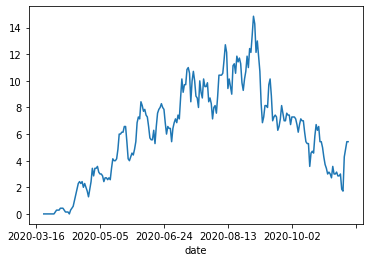

In [ ]:
numbers = caso_full_cidade_densidade_pequena_sudeste_agregado['new_deaths']
window_size = 7

numbers_series = pd.Series(numbers)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()
moving_averages.plot()

###Cidades com a densidade média:

In [ ]:
caso_full_cidade_densidade_media = caso_full_cidade_densidade[caso_full_cidade_densidade['densidade'] >= 13 ].reset_index(drop=True)
caso_full_cidade_densidade_media = caso_full_cidade_densidade[caso_full_cidade_densidade['densidade'] <= 58 ].reset_index(drop=True)
caso_full_cidade_densidade_media

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,density_state,densidade
0,Rio Verde,5218805.0,2020-03-12,11,241518.0,235647.0,False,False,1,0.41405,2020-03-12,0.0,0,1,city,GO,1,0,NaN,21.05
1,Rio Verde,5218805.0,2020-03-13,11,241518.0,235647.0,False,False,1,0.41405,2020-03-13,0.0,0,2,city,GO,0,0,NaN,21.05
2,Rio Verde,5218805.0,2020-03-14,11,241518.0,235647.0,False,False,1,0.41405,2020-03-14,0.0,0,3,city,GO,0,0,NaN,21.05
3,Rio Verde,5218805.0,2020-03-15,12,241518.0,235647.0,False,False,1,0.41405,2020-03-15,0.0,0,4,city,GO,0,0,NaN,21.05
4,Rio Verde,5218805.0,2020-03-16,12,241518.0,235647.0,False,False,2,0.82810,2020-03-16,0.0,0,5,city,GO,1,0,NaN,21.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876271,Coqueiro Baixo,4305835.0,2020-11-11,46,1495.0,1501.0,False,False,6,401.33779,2020-11-11,0.0,0,40,city,RS,0,0,NaN,13.61
876272,Coqueiro Baixo,4305835.0,2020-11-12,46,1495.0,1501.0,False,False,6,401.33779,2020-11-12,0.0,0,41,city,RS,0,0,NaN,13.61
876273,Coqueiro Baixo,4305835.0,2020-11-13,46,1495.0,1501.0,False,False,6,401.33779,2020-11-13,0.0,0,42,city,RS,0,0,NaN,13.61
876274,Coqueiro Baixo,4305835.0,2020-11-14,46,1495.0,1501.0,False,False,6,401.33779,2020-11-14,0.0,0,43,city,RS,0,0,NaN,13.61


In [ ]:
caso_full_cidade_densidade_media_sudeste = caso_full_cidade_densidade_media[caso_full_cidade_densidade_media['state'].isin(['SP', 'MG', 'RJ', 'ES'])]
caso_full_cidade_densidade_media_sudeste

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,density_state,densidade
249,Patrocínio,3148103.0,2020-03-14,11,91449.0,90757.0,False,False,1,1.09351,2020-03-14,0.0000,0,1,city,MG,1,0,NaN,28.69
250,Patrocínio,3148103.0,2020-03-15,12,91449.0,90757.0,False,True,1,1.09351,2020-03-14,0.0000,0,2,city,MG,0,0,NaN,28.69
251,Patrocínio,3148103.0,2020-03-16,12,91449.0,90757.0,False,False,1,1.09351,2020-03-16,0.0000,0,3,city,MG,0,0,NaN,28.69
252,Patrocínio,3148103.0,2020-03-17,12,91449.0,90757.0,False,False,1,1.09351,2020-03-17,0.0000,0,4,city,MG,0,0,NaN,28.69
253,Patrocínio,3148103.0,2020-03-18,12,91449.0,90757.0,False,False,1,1.09351,2020-03-18,0.0000,0,5,city,MG,0,0,NaN,28.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875100,Ribeirão Corrente,3543105.0,2020-11-11,46,4752.0,4718.0,False,False,70,1473.06397,2020-11-11,0.0143,1,85,city,SP,1,0,NaN,28.81
875101,Ribeirão Corrente,3543105.0,2020-11-12,46,4752.0,4718.0,False,False,71,1494.10774,2020-11-12,0.0141,1,86,city,SP,1,0,NaN,28.81
875102,Ribeirão Corrente,3543105.0,2020-11-13,46,4752.0,4718.0,False,True,71,1494.10774,2020-11-12,0.0141,1,87,city,SP,0,0,NaN,28.81
875103,Ribeirão Corrente,3543105.0,2020-11-14,46,4752.0,4718.0,False,False,71,1494.10774,2020-11-14,0.0141,1,88,city,SP,0,0,NaN,28.81


In [ ]:
caso_full_cidade_densidade_media_sudeste_agregado = caso_full_cidade_densidade_media_sudeste.groupby('date').sum()
caso_full_cidade_densidade_media_sudeste_agregado

,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths,densidade
date,,,,,,,,,,,,,,
2020-03-14,3.148103e+06,11,91449.0,90757.0,0,0,1,1.093510e+00,0.0000,0,1,1,0,28.69
2020-03-15,3.148103e+06,12,91449.0,90757.0,0,1,1,1.093510e+00,0.0000,0,2,0,0,28.69
2020-03-16,6.695912e+06,24,812817.0,809530.0,0,0,2,1.232140e+00,0.0000,0,4,1,0,40.41
2020-03-17,6.695912e+06,24,812817.0,809530.0,0,0,2,1.232140e+00,0.0000,0,6,0,0,40.41
2020-03-18,6.695912e+06,24,812817.0,809530.0,0,0,7,1.925260e+00,0.0000,0,8,5,0,40.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-11,4.277157e+09,59984,19467568.0,19373859.0,0,853,338248,1.961905e+06,37.7381,8805,227823,403,22,31537.08
2020-11-12,4.277157e+09,59984,19467568.0,19373859.0,0,95,340565,1.977196e+06,37.7202,8885,229127,2317,80,31537.08
2020-11-13,4.277157e+09,59984,19467568.0,19373859.0,0,546,341627,1.982698e+06,38.1132,8921,230431,1062,36,31537.08


In [ ]:
caso_full_cidade_densidade_media_sudeste_agregado['new_deaths']

date
2020-03-14     0
2020-03-15     0
2020-03-16     0
2020-03-17     0
2020-03-18     0
              ..
2020-11-11    22
2020-11-12    80
2020-11-13    36
2020-11-14    55
2020-11-15     1
Name: new_deaths, Length: 247, dtype: int64

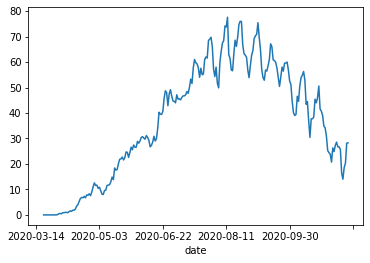

In [ ]:
numbers = caso_full_cidade_densidade_media_sudeste_agregado['new_deaths']
window_size = 7

numbers_series = pd.Series(numbers)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()
moving_averages.plot()

###Cidades com a densidade média:

In [ ]:
caso_full_cidade_densidade_alta = caso_full_cidade_densidade[caso_full_cidade_densidade['densidade'] > 58 ].reset_index(drop=True)
caso_full_cidade_densidade_alta

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,density_state,densidade
0,São Paulo,3550308.0,2020-02-25,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0,0,1,city,SP,1,0,NaN,7387.69
1,São Paulo,3550308.0,2020-02-26,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0,0,2,city,SP,0,0,NaN,7387.69
2,São Paulo,3550308.0,2020-02-27,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0,0,3,city,SP,0,0,NaN,7387.69
3,São Paulo,3550308.0,2020-02-28,9,12325232.0,12252023.0,False,False,2,0.01623,2020-02-28,0.0,0,4,city,SP,1,0,NaN,7387.69
4,São Paulo,3550308.0,2020-02-29,9,12325232.0,12252023.0,False,False,2,0.01623,2020-02-29,0.0,0,5,city,SP,0,0,NaN,7387.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294014,Boa Vista do Buricá,4302204.0,2020-11-11,46,6712.0,6712.0,False,False,128,1907.03218,2020-11-11,0.0,0,110,city,RS,3,0,NaN,60.46
294015,Boa Vista do Buricá,4302204.0,2020-11-12,46,6712.0,6712.0,False,False,128,1907.03218,2020-11-12,0.0,0,111,city,RS,0,0,NaN,60.46
294016,Boa Vista do Buricá,4302204.0,2020-11-13,46,6712.0,6712.0,False,False,129,1921.93087,2020-11-13,0.0,0,112,city,RS,1,0,NaN,60.46
294017,Boa Vista do Buricá,4302204.0,2020-11-14,46,6712.0,6712.0,False,False,137,2041.12038,2020-11-14,0.0,0,113,city,RS,8,0,NaN,60.46


In [ ]:
caso_full_cidade_densidade_alta_sudeste = caso_full_cidade_densidade_alta[caso_full_cidade_densidade_alta['state'].isin(['SP', 'MG', 'RJ', 'ES'])]
caso_full_cidade_densidade_alta_sudeste

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,density_state,densidade
0,São Paulo,3550308.0,2020-02-25,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0000,0,1,city,SP,1,0,NaN,7387.69
1,São Paulo,3550308.0,2020-02-26,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0000,0,2,city,SP,0,0,NaN,7387.69
2,São Paulo,3550308.0,2020-02-27,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0000,0,3,city,SP,0,0,NaN,7387.69
3,São Paulo,3550308.0,2020-02-28,9,12325232.0,12252023.0,False,False,2,0.01623,2020-02-28,0.0000,0,4,city,SP,1,0,NaN,7387.69
4,São Paulo,3550308.0,2020-02-29,9,12325232.0,12252023.0,False,False,2,0.01623,2020-02-29,0.0000,0,5,city,SP,0,0,NaN,7387.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293900,Canitar,3510153.0,2020-11-11,46,5292.0,5216.0,False,False,48,907.02948,2020-11-11,0.0208,1,132,city,SP,0,0,NaN,76.34
293901,Canitar,3510153.0,2020-11-12,46,5292.0,5216.0,False,False,48,907.02948,2020-11-12,0.0208,1,133,city,SP,0,0,NaN,76.34
293902,Canitar,3510153.0,2020-11-13,46,5292.0,5216.0,False,True,48,907.02948,2020-11-12,0.0208,1,134,city,SP,0,0,NaN,76.34
293903,Canitar,3510153.0,2020-11-14,46,5292.0,5216.0,False,False,48,907.02948,2020-11-14,0.0208,1,135,city,SP,0,0,NaN,76.34


In [ ]:
caso_full_cidade_densidade_alta_sudeste_agregado = caso_full_cidade_densidade_alta_sudeste.groupby('date').sum()
caso_full_cidade_densidade_alta_sudeste_agregado

,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths,densidade
date,,,,,,,,,,,,,,
2020-02-25,3.550308e+06,9,12325232.0,12252023.0,0,0,1,8.110000e-03,0.0000,0,1,1,0,7387.69
2020-02-26,3.550308e+06,9,12325232.0,12252023.0,0,0,1,8.110000e-03,0.0000,0,2,0,0,7387.69
2020-02-27,3.550308e+06,9,12325232.0,12252023.0,0,0,1,8.110000e-03,0.0000,0,3,0,0,7387.69
2020-02-28,3.550308e+06,9,12325232.0,12252023.0,0,0,2,1.623000e-02,0.0000,0,4,1,0,7387.69
2020-02-29,3.550308e+06,9,12325232.0,12252023.0,0,0,2,1.623000e-02,0.0000,0,5,0,0,7387.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-11,1.600029e+09,21850,74672739.0,74090546.0,0,227,1713594,9.921982e+05,14.3147,67328,99980,3188,180,302257.54
2020-11-12,1.600029e+09,21850,74672739.0,74090546.0,0,88,1721747,9.981854e+05,14.2877,67631,100455,8153,303,302257.54
2020-11-13,1.600029e+09,21850,74672739.0,74090546.0,0,336,1723520,1.000003e+06,14.3158,67745,100930,1773,114,302257.54


In [ ]:
caso_full_cidade_densidade_alta_sudeste_agregado['new_deaths']

date
2020-02-25      0
2020-02-26      0
2020-02-27      0
2020-02-28      0
2020-02-29      0
             ... 
2020-11-11    180
2020-11-12    303
2020-11-13    114
2020-11-14    318
2020-11-15     14
Name: new_deaths, Length: 265, dtype: int64

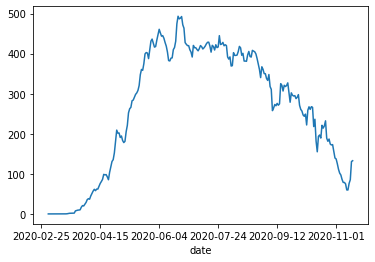

In [ ]:
numbers = caso_full_cidade_densidade_alta_sudeste_agregado['new_deaths']
window_size = 7

numbers_series = pd.Series(numbers)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()
moving_averages.plot()